In [ ]:
#Installation
!pip install auto-ts
!pip install --upgrade --user pyqt5==5.12
!pip install pystan~=2.14
!pip install fbprophet
!pip install tscv
!pip install dask
!pip install "dask[complete]"

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

/home/rupeshr/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8153688792060472      |
|           p-value           |      0.991880243437641       |
|          #Lags Used         |             13.0             |
| Number of Observations Used |            130.0             |
|     Critical Value (1%)     |     -3.4816817173418295      |
|     Critical Value (5%)     |     -2.8840418343195267      |
|     Critical Value (10%)    |      -2.578770059171598      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

NameError: name 'train' is not defined

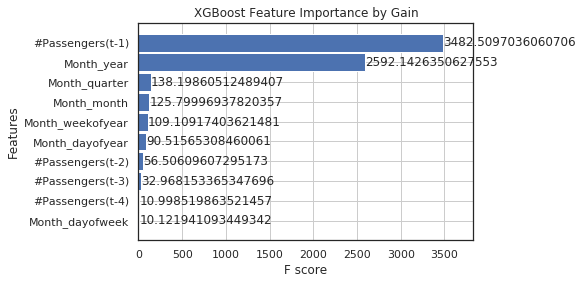

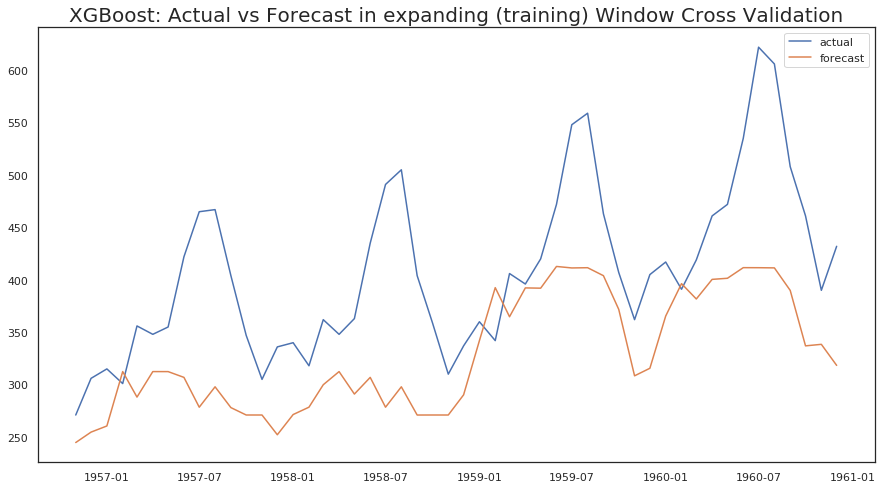

In [9]:
def autotimeseries(path,date_col,target_col,time_interval,non_seasonal_pdq,seasonality, seasonal_period,model_type,score_type,cv, forecast_period):
    df = pd.read_csv(path)
    df.dropna(how='all',inplace = True)
    df[date_col]= pd.to_datetime(df[date_col])
    df = df.sort_values(by=date_col)
    #df=df.set_index(datecol)
    #len_data = len(df)
    #train_size = int(len_data * 0.80)
    #train, test = df[0:train_size], df[train_size:len_data]
    model = auto_timeseries(score_type=score_type,forecast_period=forecast_period,time_interval=time_interval, non_seasonal_pdq=non_seasonal_pdq, seasonality=seasonality, seasonal_period=seasonal_period, model_type=model_type, verbose=2)
    model.fit(traindata=df[[date_col, target_col]], ts_column=date_col, target=target_col, cv=cv)
    leader_board=model.get_leaderboard()
    cv_scores=model.get_cv_scores()
    future_forecasting = model.predict(testdata=forecast_period, model=model_type)
    print(future_forecasting)
    return leader_board,cv_scores,train,test,future_forecasting
path='/home/rupeshr/Desktop/TSA_Python/dataset/data_new/30-6/AirPassengers.csv'
date_col='Month'
target_col='#Passengers'
time_interval=None
non_seasonal_pdq=None
seasonality=True
seasonal_period=12
model_type='ML'
score_type='rmse'
cv=2
forecast_period=25
leader_board,cv_scores,train,test,future_forecasting=autotimeseries(path,date_col,target_col,time_interval,non_seasonal_pdq,seasonality, seasonal_period,model_type,score_type,cv, forecast_period)

In [4]:
#future_forecasting.reset_index('Month',inplace = True)
future_forecasting

NameError: name 'future_forecasting' is not defined

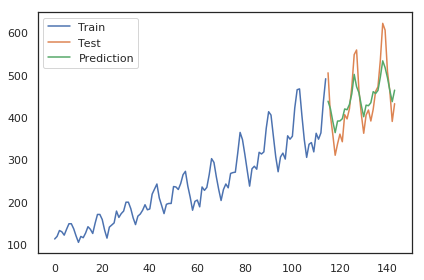

In [51]:
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(future_forecasting['yhat'], label='Prediction')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
import lightgbm as lgb

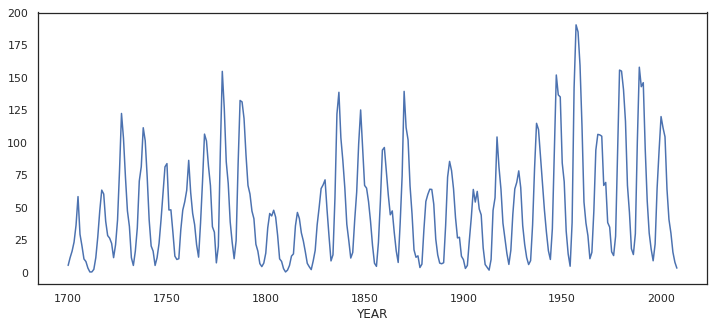

In [11]:
import statsmodels.api as sm

data = sm.datasets.sunspots.load_pandas()
ts_sun = data.data.set_index('YEAR').SUNACTIVITY
ts_sun.plot(figsize=(12, 5))
plt.show()

In [12]:
test_len = int(len(ts_sun) * 0.2)
sun_train, sun_test = ts_sun.iloc[:-test_len], ts_sun.iloc[-test_len:]

In [13]:
def create_forecaster():
    
    # creating forecaster with LightGBM
    regressor = lgb.LGBMRegressor()
    forecaster = make_reduction(regressor, window_length=5, strategy="recursive")
    
    return forecaster

def grid_serch_forecaster(train, test, forecaster, param_grid):

    # Grid search on window_length
    cv = ExpandingWindowSplitter(initial_window=int(len(train) * 0.7))
    gscv = ForecastingGridSearchCV(
        forecaster, strategy="refit", cv=cv, param_grid=param_grid
    )
    gscv.fit(train)
    print(f"best params: {gscv.best_params_}")
    
    # forecasting
    fh=np.arange(len(test))+1
    y_pred = gscv.predict(fh=fh)
    mae, mape = plot_forecast(train, test, y_pred)

    return mae, mape
    
param_grid = {"window_length": [5, 10, 15, 20, 25, 30]} # parameter set to be grid searched
forecaster = create_forecaster()
sun_lgb_mae, sun_lgb_mape = grid_serch_forecaster(sun_train, sun_test, forecaster, param_grid)


NotImplementedError: <class 'pandas.core.indexes.numeric.Float64Index'> is not supported, use one of (<class 'pandas.core.indexes.numeric.Int64Index'>, <class 'pandas.core.indexes.range.RangeIndex'>, <class 'pandas.core.indexes.period.PeriodIndex'>, <class 'pandas.core.indexes.datetimes.DatetimeIndex'>) instead.